In [1]:
path=  'C:/Users/felipe/Documents/Brain/'
import sys
sys.path.append(path) 

In [2]:
path_=  'C:/Users/felipe/Documents/Brain/Models/'
import sys
sys.path.append(path_) 

In [3]:
from xgboost_regressor import XGBoostRegressor
from Plotter import Plotter


c:\Users\felipe\Documents\Brain\brain_age_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
import pandas as pd
import pickle


file_name = '/Brain_Age/dataframe_alpha.xlsx'
file_path = f"{path}{file_name}"
df = pd.read_excel(file_path)
# Filtrar las filas con Age mayor de 20
df_filtrado = df[df['Age'] > 20].reset_index(drop=True)
# Separar la variable de destino (y) y las características (X)
X = df_filtrado.drop(columns=["Unnamed: 0", "Age"])
y = df_filtrado["Age"]

In [5]:
xgb_model = XGBoostRegressor()
xgb_model.set_data(X,y)
Plotters = Plotter()

In [6]:
with open(f'{path}Opt_Model/opt_XGB_model_400iter.pickle', 'rb') as file:
    opt_xgb= pickle.load(file)

In [7]:
errores = opt_xgb.cv_results_['mean_test_score'][:50]


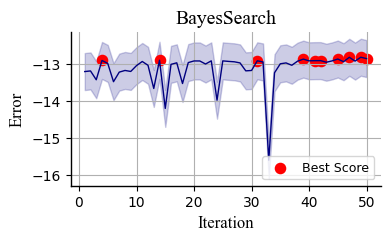

Top 1: Iteration 49, Score -12.819045331675337
Top 2: Iteration 47, Score -12.821240859176172
Top 3: Iteration 50, Score -12.856645611443545
Top 4: Iteration 45, Score -12.867626326839812
Top 5: Iteration 39, Score -12.870489643215643
Top 6: Iteration 14, Score -12.900176582367667
Top 7: Iteration 4, Score -12.906530776933801
Top 8: Iteration 42, Score -12.910540481961036
Top 9: Iteration 41, Score -12.91165666017837
Top 10: Iteration 31, Score -12.91588314543778


In [8]:
Plotters.plot_iteration(y=errores, title='BayesSearch', xlabel='Iteration', ylabel='Error', legend_result=False, best_result=True, y_size=2, font='Times New Roman', weight='normal', mode=2)

In [10]:
best_params_xgb = xgb_model.best_hyper(opt_model=opt_xgb, num_max=100)

In [11]:
best_params_xgb

[{'colsample_bytree': 0.6,
  'learning_rate': 0.01,
  'max_depth': 5,
  'n_estimators': 660,
  'subsample': 0.6},
 {'colsample_bytree': 0.6,
  'learning_rate': 0.01,
  'max_depth': 5,
  'n_estimators': 659,
  'subsample': 0.6},
 {'colsample_bytree': 0.6,
  'learning_rate': 0.01,
  'max_depth': 5,
  'n_estimators': 662,
  'subsample': 0.6},
 {'colsample_bytree': 0.6,
  'learning_rate': 0.01,
  'max_depth': 5,
  'n_estimators': 650,
  'subsample': 0.6},
 {'colsample_bytree': 0.6,
  'learning_rate': 0.01,
  'max_depth': 5,
  'n_estimators': 657,
  'subsample': 0.6},
 {'colsample_bytree': 0.6,
  'learning_rate': 0.01,
  'max_depth': 5,
  'n_estimators': 652,
  'subsample': 0.6},
 {'colsample_bytree': 0.6,
  'learning_rate': 0.01,
  'max_depth': 5,
  'n_estimators': 653,
  'subsample': 0.6},
 {'colsample_bytree': 0.6,
  'learning_rate': 0.01,
  'max_depth': 5,
  'n_estimators': 651,
  'subsample': 0.6},
 {'colsample_bytree': 0.6,
  'learning_rate': 0.01,
  'max_depth': 5,
  'n_estimators': 

In [237]:
xgb_model.fit_params_train = {
                "early_stopping_rounds":10,
                "eval_metric": "mae",
                "eval_set": [(xgb_model.X_test, xgb_model.y_test)],
                "verbose": False
            }

In [207]:
xgb_model.fit_params_train = {
                "eval_set": [(xgb_model.X_test, xgb_model.y_test)],
                "verbose": False
            }

xgb_model.model_params_train={"early_stopping_rounds": 5,
                "eval_metric": "mae"}

In [211]:
xgb_model.fit_params_train = {}

xgb_model.model_params_train={}

In [ ]:
results, best_model_results, best_model, residual_model = xgb_model.trainer_2(params_=best_params_xgb[0])

In [13]:
#with open(f'{path}Opt_Model_2/BestModel_XGB_all_features.pickle', 'wb') as file:
#    pickle.dump(xgb_model.model, file)
#with open(f'{path}Opt_Model_2/results_XGB_model_all_features.pickle', 'wb') as file:
#    pickle.dump(results, file)
#with open(f'{path}Opt_Model_2/residual_model_XGB_model_all_features.pickle', 'wb') as file:
#    pickle.dump(residual_model, file)

In [12]:
with open(f'{path}Opt_Model_2/BestModel_XGB_all_features.pickle', 'rb') as file:
    model =  pickle.load(file)
    
with open(f'{path}Opt_Model_2/results_XGB_model_all_features.pickle', 'rb') as file:
    results =  pickle.load(file)

with open(f'{path}Opt_Model_2/residual_model_XGB_model_all_features.pickle', 'rb') as file:
    residual_model =  pickle.load(file)

In [ ]:
results

In [13]:
xgb_model.model=model
xgb_model.residual_model = residual_model

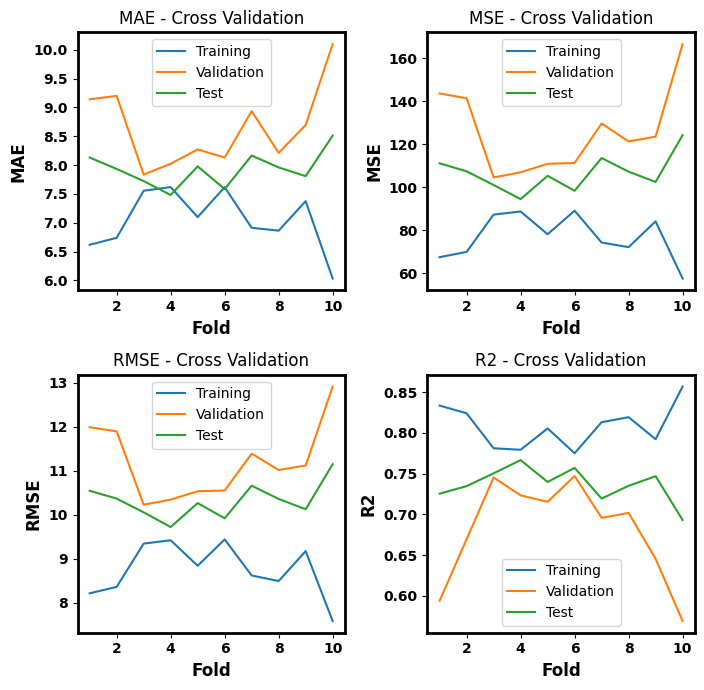

In [14]:
Plotters.plot_metricas_evaluacion(results)

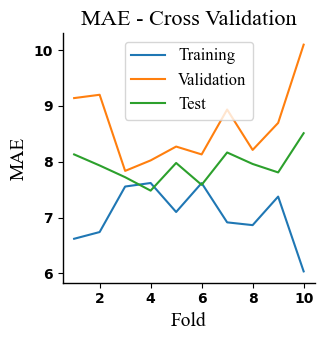

In [14]:
Plotters.plot_metrica_evaluacion(results, font='Times New Roman',mode=2,fontsize=14,x_size=3.5,y_size=3.5 )

In [15]:
y_pred=xgb_model.predicter_corrected_2(X_test= xgb_model.X_test)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     836.0
Date:                Tue, 03 Sep 2024   Prob (F-statistic):           3.20e-85
Time:                        19:54:37   Log-Likelihood:                -993.57
No. Observations:                 276   AIC:                             1991.
Df Residuals:                     274   BIC:                             1998.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.9608      1.368      8.744      0.0

C:\Users/felipe/Documents/Brain/Models\Plotter.py:213: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = linear_model.pvalues[1]


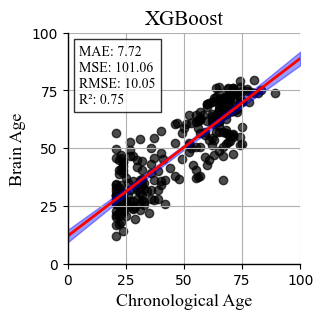

Error medio absoluto: 7.723095679810836
Error cuadrático medio: 101.0642055942063
Raíz del error cuadrático medio: 10.053069461324053
Coeficiente de determinación (R²): 0.7502782711878307


In [16]:
Plotters.plot_regresion(y=y_pred,x= xgb_model.y_test, label_='Test Data',x_ticks_step=25,y_ticks_step=25,x_min_limit=0,y_min_limit=0,x_max_limit=100,y_max_limit=100,color='Black', title='XGBoost',line_ideal=False,confidence_interval=True,  alpha=0.7,xlabel='Chronological Age',ylabel='Brain Age',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red', details=True, font='Times New Roman', weight='normal', x_size=3,y_size=3, legend=False, fontsize=13, mode=2)

C:\Users/felipe/Documents/Brain/Models\Plotter.py:213: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = linear_model.pvalues[1]


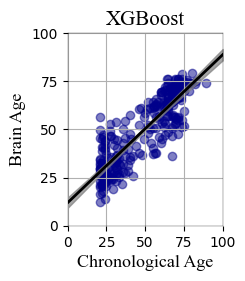

Error medio absoluto: 7.723095679810836
Error cuadrático medio: 101.0642055942063
Raíz del error cuadrático medio: 10.053069461324053
Coeficiente de determinación (R²): 0.7502782711878307


In [25]:
Plotters.plot_regresion(y=y_pred,x= xgb_model.y_test, label_='Test Data',x_ticks_step=25,y_ticks_step=25,x_min_limit=0,y_min_limit=0,x_max_limit=100,y_max_limit=100,color=(0, 0, 0.545), title='XGBoost',line_ideal=False,confidence_interval=True,  alpha=0.5,xlabel='Chronological Age',ylabel='Brain Age',color_confidence_interval='gray',alpha_confidence_interval=0.7,color_line_fit=(0, 0, 0), details=False, font='Times New Roman', weight='normal', x_size=2,y_size=2.5, legend=False, fontsize=13, mode=3, legend_metrics=False)

In [25]:
with open('y_pred_xgb.txt', 'w') as f:
    for value in y_pred:
        f.write(f"{value:.4f}\n")
with open('y_test_xgb.txt', 'w') as f:
    for value in xgb_model.y_test:
        f.write(f"{value:.4f}\n")

In [19]:
shap_values, shap_summary_sorted = xgb_model.feature_importance_shap(X_test=xgb_model.X_test,model=xgb_model.model)

Importancia de características basada en suma de valores SHAP:
Low_subj_spec_EPP_OCC_right: 564.656494140625
IAF_OCC_right: 563.301025390625
IAF_OCC_left: 550.310302734375
Low_subj_spec_RPD_HPC_left: 301.7456970214844
High_subj_spec_EPP_CING_right: 299.4403381347656
Low_subj_spec_EPP_PARIET_right: 278.7362365722656
Low_subj_spec_RPD_CING_right: 250.01206970214844
Low_subj_spec_RPD_OCC_left: 207.1194610595703
High_subj_spec_RPD_CING_right: 200.0408172607422
Alpha2_canon_EPP_HPC_left: 197.26234436035156
Low_subj_spec_EPP_PARIET_left: 178.4735565185547
Alpha2_canon_EPP_PARIET_left: 152.58299255371094
Alpha2_canon_RPD_CING_right: 150.6533660888672
IAF_INS_left: 127.12249755859375
Alpha2_canon_EPP_PARIET_right: 123.29722595214844
High_subj_spec_EPP_OCC_left: 113.35005950927734
Low_subj_spec_EPP_CING_left: 102.40276336669922
High_subj_spec_EPP_PARIET_right: 98.18099975585938
High_subj_spec_EPP_PARIET_left: 96.54193878173828
IAF_INS_right: 89.35801696777344
Low_subj_spec_RPD_PARIET_right: 88.

In [17]:
with open(f'{path}Opt_Model_2/shap_values_xgb.pickle', 'wb') as file:
        pickle.dump(shap_values, file)
with open(f'{path}Opt_Model_2/shap_summary_sorted_xgb.pickle', 'wb') as file:
        pickle.dump(shap_summary_sorted, file)

In [9]:
with open(f'{path}Opt_Model_2/shap_values_xgb.pickle', 'rb') as file:
    shap_values = pickle.load(file)

with open(f'{path}Opt_Model_2/shap_summary_sorted_xgb.pickle', 'rb') as file:
    shap_summary_sorted = pickle.load(file)

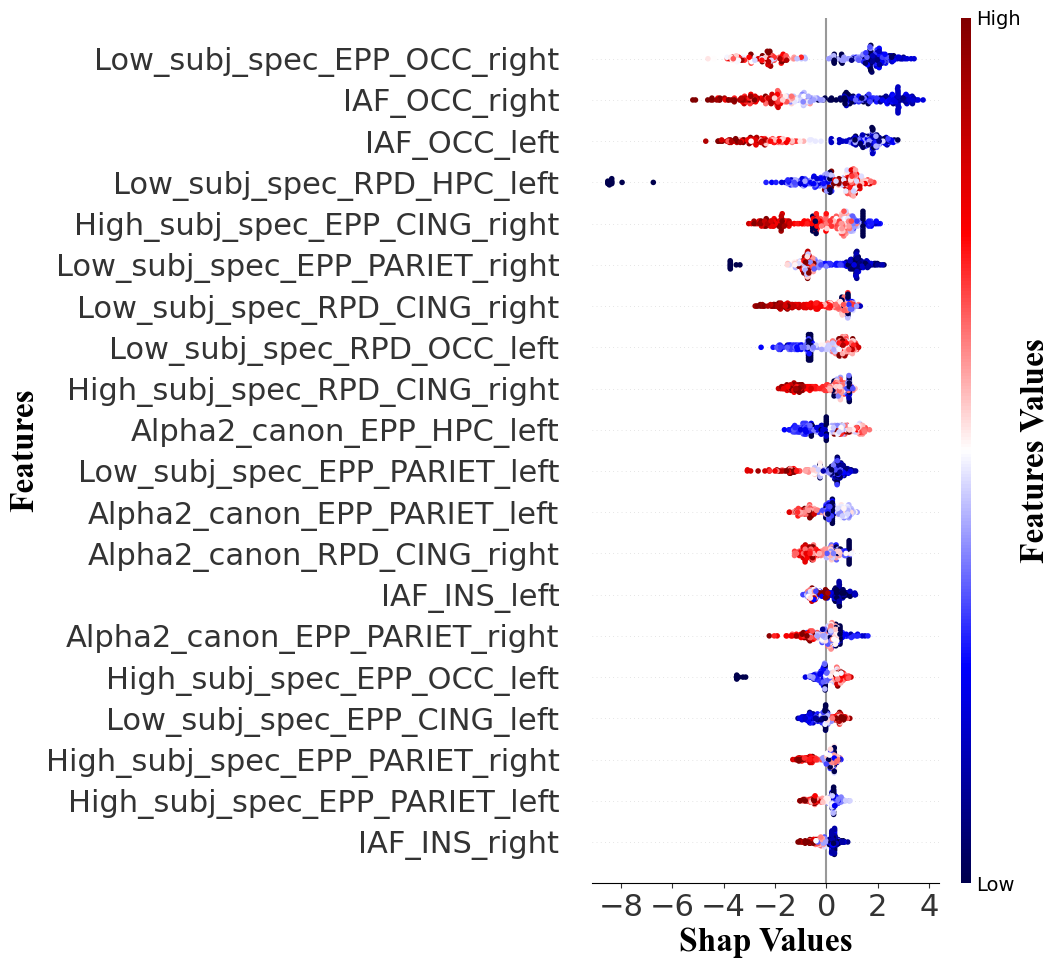

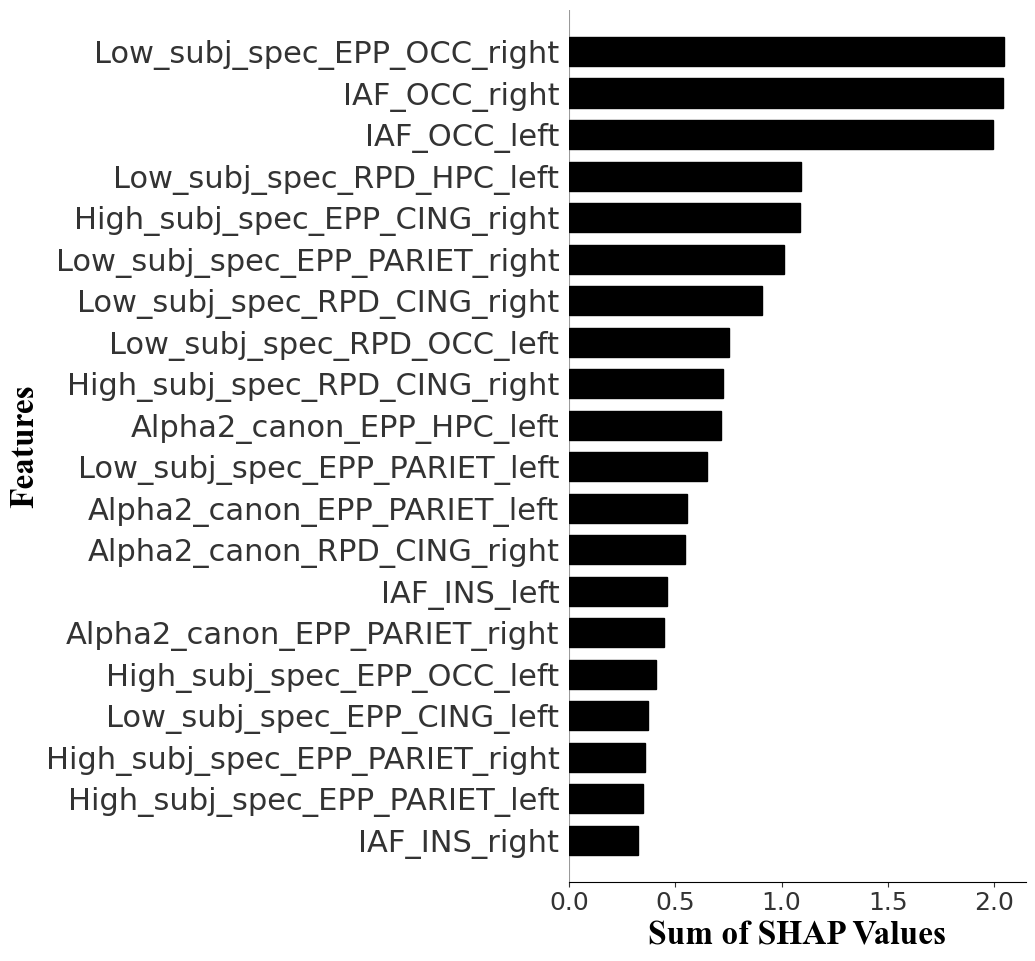

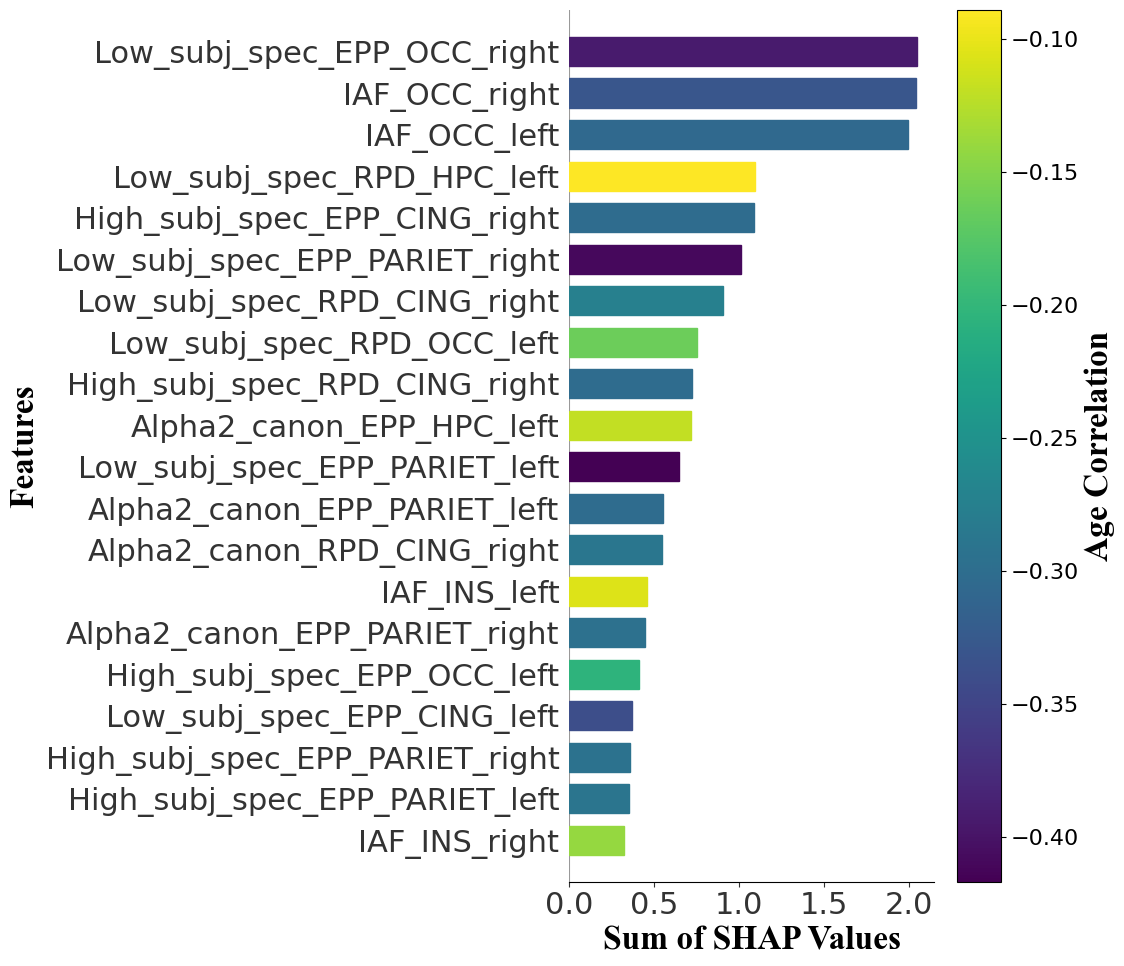

In [27]:
Plotters.plot_feature_importance(shap_values=shap_values,X_test=xgb_model.X_test,y_test=xgb_model.y_test, font= "Times New Roman", fontsize=24, xlabel1='Shap Values', xlabel2='Sum of SHAP Values',ylabel='Features', ylabel1='Features Values', ylabel2='Age Correlation')

In [12]:
shap_por_region_sorted, resultado_normalizado_sorted=xgb_model.shap_region(shap_summary_sorted=shap_summary_sorted, num_max=10)

OCC_right: 1.000000
OCC_left: 0.671506
CING_right: 0.664469
HPC_left: 0.442400
PARIET_right: 0.247116


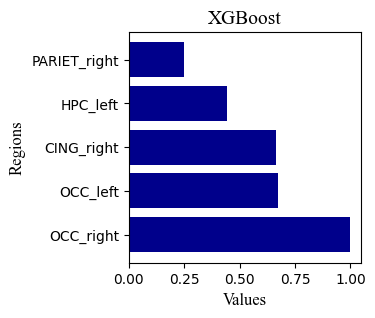

In [16]:
Plotters.plot_normalized_values(resultado_normalizado_sorted, color=(0, 0, 0.545), name_set='XGBoost',x_size=3,y_size=3,font='Times New Roman', fontsize=12, xlabel='Values', ylabel='Regions')

c:\Users\felipe\Documents\Brain\brain_age_env\Lib\site-packages\nilearn\plotting\displays\_slicers.py:308: UserWarning: empty mask
  ims = self._map_show(img, type="imshow", threshold=threshold, **kwargs)


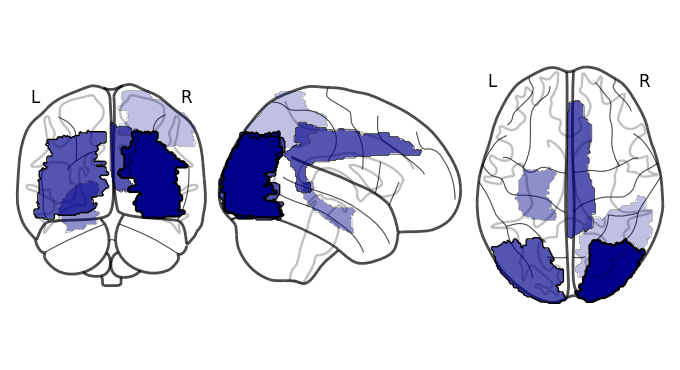

In [40]:
base_path = f'{path}cerebritos/'

Plotters.plot_brain_regions(resultado_normalizado_sorted, base_path, color='darkblue')